In [ ]:
# Gopal Krishna
# 12/15/22
# CS7180 - Advanced Perception

In [ ]:
import gc
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# plt.figure(figsize=(8, 7))


In [ ]:
def list_full_paths(directory):
    return [
        os.path.join(directory, file) for file in os.listdir(directory) if not file.startswith('.')
    ], [folder for folder in os.listdir(directory) if not folder.startswith('.')]


In [ ]:
def extract_mel_spectrogram(path, name):
    gc.collect()
    y, sr = librosa.load(path)
    mel_signal = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=512, n_fft=2048)
    spectrogram = np.abs(mel_signal)
    power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(
        power_to_db, sr=sr, x_axis="time", y_axis="mel", cmap="magma", hop_length=512
    )
    plt.axis("off")
    plt.savefig(destination_path + "/" + name[:-4] + ".png", dpi=500, bbox_inches='tight', pad_inches=-0.1)
    # plt.show()


In [ ]:
source_path = r"./validation/drilling"
destination_path = r"./validation/mel/drilling"
l, r = list_full_paths(source_path)
l, r

(['./train/drilling/181624-4-7-0.wav',
  './train/drilling/135849-4-0-0.wav',
  './train/drilling/180127-4-0-12.wav',
  './train/drilling/58937-4-5-2.wav',
  './train/drilling/17913-4-0-1.wav',
  './train/drilling/180937-4-1-54.wav',
  './train/drilling/29721-4-0-1.wav',
  './train/drilling/103199-4-2-0.wav',
  './train/drilling/55020-4-0-11.wav',
  './train/drilling/71529-4-1-3.wav',
  './train/drilling/180134-4-2-3.wav',
  './train/drilling/169466-4-1-3.wav',
  './train/drilling/167701-4-6-2.wav',
  './train/drilling/57584-4-0-8.wav',
  './train/drilling/205610-4-0-2.wav',
  './train/drilling/29721-4-0-13.wav',
  './train/drilling/168037-4-9-0.wav',
  './train/drilling/166931-4-2-0.wav',
  './train/drilling/165645-4-1-0.wav',
  './train/drilling/71171-4-0-1.wav',
  './train/drilling/128607-4-0-4.wav',
  './train/drilling/169466-4-3-1.wav',
  './train/drilling/39532-4-3-0.wav',
  './train/drilling/167701-4-4-0.wav',
  './train/drilling/180937-4-0-14.wav',
  './train/drilling/95562-4-1

100%|█████████████████████████████████████████| 200/200 [10:33<00:00,  3.17s/it]


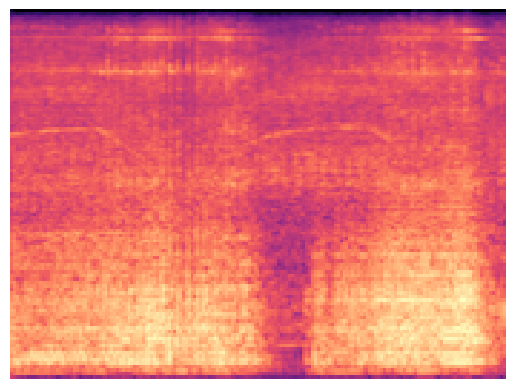

In [ ]:
from tqdm import tqdm

for i in tqdm(range(len(l[600:]))):
    extract_mel_spectrogram(l[i], r[i])
